In [ ]:
import pandas as pd


In [ ]:
p1 = pd.read_excel("/content/drive/MyDrive/curso pandas dio/datasets/Aracaju.xlsx")
p2 = pd.read_excel("/content/drive/MyDrive/curso pandas dio/datasets/Fortaleza.xlsx")
p3 = pd.read_excel("/content/drive/MyDrive/curso pandas dio/datasets/Natal.xlsx")
p4 = pd.read_excel("/content/drive/MyDrive/curso pandas dio/datasets/Recife.xlsx")
p5 = pd.read_excel("/content/drive/MyDrive/curso pandas dio/datasets/Salvador.xlsx")

In [ ]:
p5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [ ]:
# concateia os dataframes p1,p2,p3,p4,p5

In [ ]:
df = pd.concat([p1,p2,p3,p4,p5])

In [ ]:
df


,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8
...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1


In [ ]:
#amostra de dados de df

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
181,Natal,2019-01-02,244.83,1037,2
102,Salvador,2019-01-01,40.84,1034,3
53,Aracaju,2018-01-01,8.64,1522,2
37,Fortaleza,2019-01-01,35.86,1002,6
63,Aracaju,2018-01-01,39.87,1522,5


In [ ]:
#tipo de dados de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Alterando otipo de dado da coluna LojaID
df['LojaID'] = df['LojaID'].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Consultando se há linhas com valores faltantes 
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#Subustituindo os valores nulos pela média
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [ ]:


#Substituindo os valores nulos por 0

df["Vendas"].fillna(0,inplace=True)

In [ ]:

df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
df['Vendas'].mean()

122.61180089485458

In [ ]:
#Apagando as linhas com valores nulos com base apaenas em uma coluna
df.dropna(subset=["Vendas"],inplace=True)

In [ ]:
#Apagando as linhas com valores nulos 
df.dropna(inplace=True)



In [ ]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

**Criando colunas novas **


In [ ]:





#Criando coluna de Receitas

In [ ]:
df["Receita"] = df["Vendas"].mul(df['Qtde'])

In [ ]:
df


,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08
...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84
236,Salvador,2019-01-03,126.29,1035,3,378.87
237,Salvador,2019-01-03,38.06,1036,3,114.18
238,Salvador,2019-01-03,139.64,1035,1,139.64


In [ ]:
#Maior receita

In [ ]:
df["Receita"].max()

3544.0

In [ ]:
#Menor receita

In [ ]:
df["Receita"].min()

3.34

In [ ]:
#retorna as 4 linhas com maiores  da coluna receitas

In [ ]:
df.nlargest(4,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0


In [ ]:
#Retorna as 3 linhas com menores  da coluna receitas

In [ ]:
df.nsmallest(5,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57
92,Salvador,2019-01-01,4.57,1035,1,4.57
95,Natal,2019-01-02,5.13,1035,1,5.13


In [ ]:
#agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Ordenando conjunto de dados
df.sort_values("Receita", ascending=False)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.00,853,4,3544.00
55,Natal,2019-01-08,859.00,854,4,3436.00
51,Natal,2018-01-21,859.00,852,4,3436.00
30,Natal,2018-10-02,856.00,853,4,3424.00
41,Natal,2018-05-20,835.00,852,4,3340.00
...,...,...,...,...,...,...
95,Natal,2019-01-02,5.13,1035,1,5.13
92,Natal,2019-01-02,4.57,1035,1,4.57
92,Salvador,2019-01-01,4.57,1035,1,4.57
65,Recife,2019-01-01,4.01,981,1,4.01


In [ ]:
#Tranformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [ ]:
#verificando o tipo de data em data
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID       int64
Qtde         int64
Receita    float64
dtype: object

In [ ]:

#Transformando a coluna de data em data
df['Data'] = pd.to_datetime(df["Data"])



In [ ]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID              int64
Qtde                int64
Receita           float64
dtype: object

In [ ]:


#agrupamento por ano 
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#criando uma nova coluna com o ano
df["Ano_Vendas"] = df["Data"].dt.year

In [ ]:
df


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018
...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019


In [ ]:
# Extraindo o mês e os dia de uma venda
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Vendas,mes_venda,dia_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1
...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,1,3
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3


In [ ]:
df.sample(13)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Vendas,mes_venda,dia_venda
79,Recife,2019-01-01,14.53,983,6,87.18,2019,1,1
180,Salvador,2019-01-02,116.63,1035,2,233.26,2019,1,2
239,Natal,2019-01-03,161.41,1037,3,484.23,2019,1,3
16,Aracaju,2018-01-01,37.68,1522,10,376.80,2018,1,1
13,Recife,2019-02-12,15.33,983,5,76.65,2019,2,12
119,Natal,2019-01-02,136.37,1034,2,272.74,2019,1,2
103,Fortaleza,2019-01-01,142.57,1002,3,427.71,2019,1,1
115,Salvador,2019-03-02,202.33,1035,2,404.66,2019,3,2
27,Natal,2018-07-16,390.00,853,3,1170.00,2018,7,16
48,Aracaju,2018-01-01,35.90,1521,8,287.20,2018,1,1


In [ ]:
#retornando a data mais antiga 
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#retornando a data mais recente
df["Data"].max()

Timestamp('2019-04-05 00:00:00')

In [ ]:
#Calculando a diferença de dias entre a primeira data(inicio da contagem)
df["Diferenca_dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(13)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Vendas,mes_venda,dia_venda,Diferenca_dias
179,Salvador,2019-01-02,64.95,1036,1,64.95,2019,1,2,366 days
28,Fortaleza,2019-01-01,34.88,1004,3,104.64,2019,1,1,365 days
199,Salvador,2019-01-02,153.87,1036,3,461.61,2019,1,2,366 days
15,Aracaju,2018-01-01,153.28,1523,6,919.68,2018,1,1,0 days
14,Recife,2019-01-12,102.91,982,3,308.73,2019,1,12,376 days
13,Aracaju,2018-01-01,43.45,1522,10,434.50,2018,1,1,0 days
62,Fortaleza,2019-01-01,106.21,1005,6,637.26,2019,1,1,365 days
64,Aracaju,2018-01-01,21.00,1523,5,105.00,2018,1,1,0 days
203,Natal,2019-01-02,37.75,1035,2,75.50,2019,1,2,366 days
105,Salvador,2019-01-01,32.83,1037,1,32.83,2019,1,1,365 days


In [ ]:
#Criando uma coluna trimestre
df["trimestre_venda"] = df["Data"].dt.quarter


In [ ]:
#Filtrando as vendas de 2019 do mês de março


In [ ]:
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Vendas,mes_venda,dia_venda,Diferenca_dias,trimestre_venda
195,Salvador,2019-01-02,44.89,1036,3,134.67,2019,1,2,366 days,1
114,Fortaleza,2019-03-02,16.82,983,4,67.28,2019,3,2,425 days,1
123,Recife,2019-03-02,20.22,981,6,121.32,2019,3,2,425 days,1
127,Aracaju,2018-01-01,33.12,1522,9,298.08,2018,1,1,0 days,1
159,Salvador,2019-01-02,172.52,1035,1,172.52,2019,1,2,366 days,1
143,Natal,2019-01-02,41.18,1037,2,82.36,2019,1,2,366 days,1
214,Salvador,2019-01-02,54.94,1036,2,109.88,2019,1,2,366 days,1
70,Salvador,2019-01-01,39.06,1034,3,117.18,2019,1,1,365 days,1
37,Fortaleza,2019-01-01,35.86,1002,6,215.16,2019,1,1,365 days,1
31,Aracaju,2018-01-01,171.16,1520,9,1540.44,2018,1,1,0 days,1


In [ ]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Vendas,mes_venda,dia_venda,Diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


In [ ]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Vendas,mes_venda,dia_venda,Diferenca_dias,trimestre_venda
26,Natal,2018-07-20,370.00,853,3,1110.00,2018,7,20,200 days,3
30,Recife,2019-01-01,12.35,980,5,61.75,2019,1,1,365 days,1
14,Recife,2019-01-12,102.91,982,3,308.73,2019,1,12,376 days,1
211,Natal,2019-01-02,141.05,1035,3,423.15,2019,1,2,366 days,1
210,Salvador,2019-01-02,197.64,1035,1,197.64,2019,1,2,366 days,1
83,Aracaju,2018-01-01,14.44,1520,5,72.20,2018,1,1,0 days,1
162,Natal,2019-01-02,23.08,1036,2,46.16,2019,1,2,366 days,1
108,Recife,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
166,Natal,2019-01-02,111.72,1035,3,335.16,2019,1,2,366 days,1
48,Fortaleza,2019-01-01,40.71,1002,6,244.26,2019,1,1,365 days,1


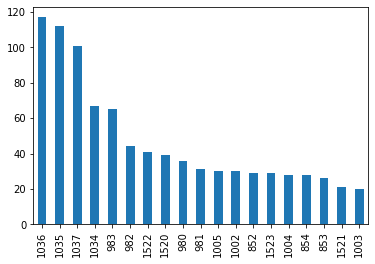

In [ ]:
df['LojaID'].value_counts(ascending=False).plot.bar()

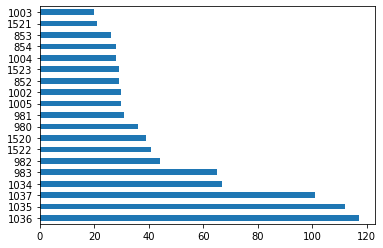

In [ ]:
df['LojaID'].value_counts(ascending=False).plot.barh()

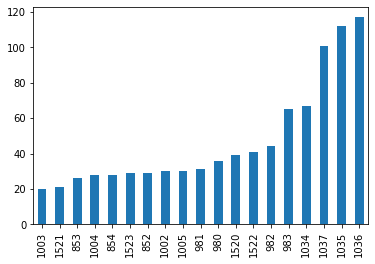

In [ ]:
df['LojaID'].value_counts(ascending=True).plot.bar()

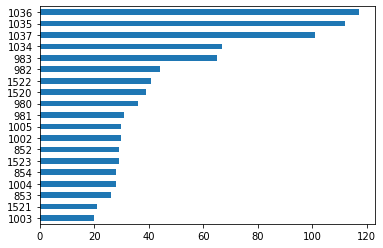

In [ ]:
df['LojaID'].value_counts(ascending=True).plot.barh();

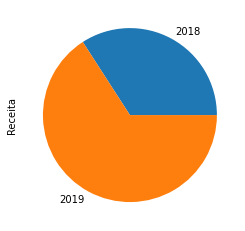

In [ ]:
#Grafico Pizza

df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [ ]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

In [ ]:


#Adicionando um titulo 

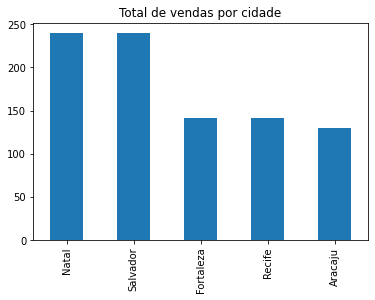

In [ ]:
from numpy.lib.shape_base import tile
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade");

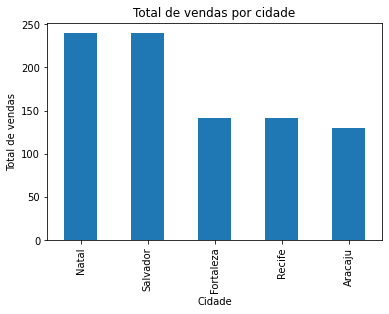

In [ ]:
#Adicionando um titulo e alterando o nome dos eixos
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade");
plt.xlabel("Cidade");
plt.ylabel("Total de vendas");

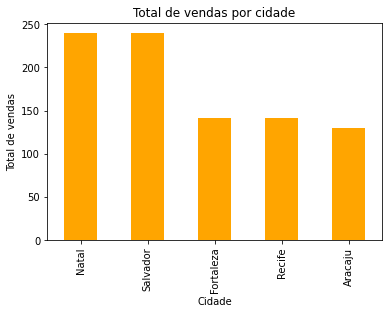

In [ ]:

#Alterando color  do grafico para laranja

#Adicionando um titulo e alterando o nome dos eixos
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade",color='orange');
plt.xlabel("Cidade");
plt.ylabel("Total de vendas");


In [ ]:
#Alterando estilo do grafico
plt.style.use('dark_background')

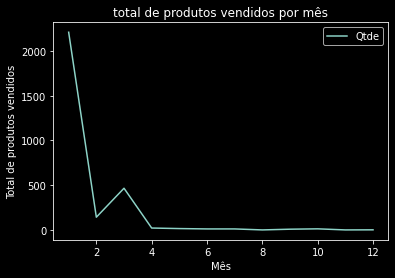

In [ ]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title= "total de produtos vendidos por mês");
plt.xlabel('Mês');
plt.ylabel('Total de produtos vendidos');
plt.legend();

In [ ]:

df.groupby(df['mes_venda'])['Qtde'].sum()


mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [ ]:
#Selecionando apenas o ano de 2019

df_2019 = df[df['Ano_Vendas'] == 2019 ]

In [ ]:

df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

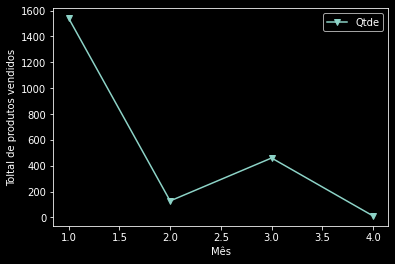

In [ ]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker ="v");
plt.xlabel('Mês');
plt.ylabel("Toltal de produtos vendidos");
plt.legend();

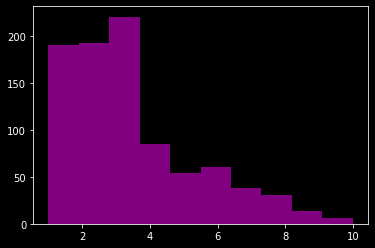

In [ ]:

#Histograma
plt.hist(df['Qtde'],color='purple');

In [ ]:
df

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Vendas,mes_venda,dia_venda,Diferenca_dias,trimestre_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1,0 days,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1,0 days,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1,0 days,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1,0 days,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1,0 days,1
...,...,...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3,367 days,1
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,1,3,367 days,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3,367 days,1
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3,367 days,1


In [ ]:
df['Qtde'].max()

10

In [ ]:

 #Alterando estilo do grafico
plt.style.use('Solarize_Light2')

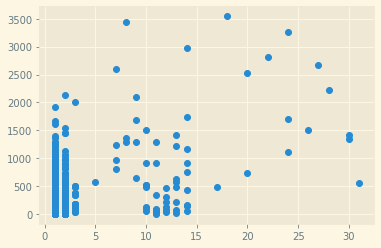

In [ ]:
#Grafico de disperção

plt.scatter(x=df_2019['dia_venda'], y = df_2019['Receita']);

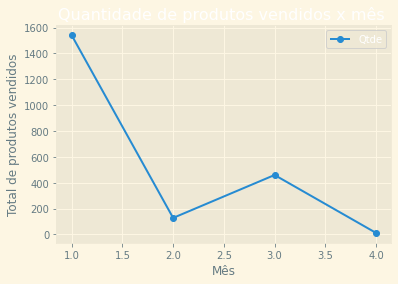

In [ ]:
#Salvando png

df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker = "o");
plt.title("Quantidade de produtos vendidos x mês ")
plt.xlabel('Mês');
plt.ylabel('Total de produtos vendidos');
plt.legend()
plt.savefig('Grafico QTDE X MES.png')